In [5]:
# Library
import pandas as pd

## Data cleaning and merging

### Cleaning of population Data

In [6]:
# Read data
population_df = pd.read_csv('../../data/raw/external/population_income/population_2001-23.csv', encoding='ISO-8859-1')

# Data cleaning
population_df = population_df[population_df.iloc[:, 1].isin(['2', 2])] # retain victoria data
# remove unused data
population_df = population_df.iloc[:, [0, 6, 8, 9, 10, 29]]
# add column name
population_df.columns = ['Year', 'SA4 name', 'SA3 name', 'SA2 code', 'SA2 name', 'Total persons']
# change numbers to integers
population_df['SA2 code'] = population_df['SA2 code'].astype(int)
population_df['Total persons'] = population_df['Total persons'].astype(int)


/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_89049/4262314204.py:2: DtypeWarning: Columns (1,5,7,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv('../../data/raw/external/population_income/population_2001-23.csv', encoding='ISO-8859-1')


In [7]:
population_df.head()

,Year,SA4 name,SA3 name,SA2 code,SA2 name,Total persons
648,2001,Ballarat,Ballarat,201011001,Alfredton,5756
649,2001,Ballarat,Ballarat,201011002,Ballarat,11497
650,2001,Ballarat,Ballarat,201011005,Buninyong,5320
651,2001,Ballarat,Ballarat,201011006,Delacombe,4154
652,2001,Ballarat,Ballarat,201011007,Smythes Creek,3317


### Merging population data and mesh block data

In [8]:
# Read data
mb_df = pd.read_csv('../../data/raw/external/population_income/MB_2021.csv', encoding='ISO-8859-1')

# Data cleaning
mb_df = mb_df[mb_df.iloc[:, 13] == 2] # retain victoria data
mb_df = mb_df.iloc[:, [0, 5, 13, 14]]
mb_df_unique = mb_df[['SA2_CODE_2021', 'MB_CODE_2021']].drop_duplicates(subset='SA2_CODE_2021')

# Merge
population_df = population_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

population_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
population_df.drop(columns=['SA2_CODE_2021'], inplace=True)

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_89049/2136683683.py:2: DtypeWarning: Columns (0,4,5,7,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  mb_df = pd.read_csv('../../data/raw/external/population_income/MB_2021.csv', encoding='ISO-8859-1')


### Merging population data and postal area data

In [9]:
# Read data
poa_df = pd.read_csv('../../data/raw/external/population_income/POA_2021.csv', encoding='ISO-8859-1')

# Merge
population_df = population_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
population_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
population_df.drop(columns=['MB_CODE_2021'], inplace=True)

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_89049/1484317951.py:2: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  poa_df = pd.read_csv('../../data/raw/external/population_income/POA_2021.csv', encoding='ISO-8859-1')


In [10]:
population_df = population_df[population_df['Total persons'] != 0] # delet zero number of person
print(len(population_df))
population_df.head()

11885


,Year,SA4 name,SA3 name,SA2 code,SA2 name,Total persons,MB code,Postcode
0,2001,Ballarat,Ballarat,201011001,Alfredton,5756,20004360000,3350
1,2001,Ballarat,Ballarat,201011002,Ballarat,11497,20004170000,3350
2,2001,Ballarat,Ballarat,201011005,Buninyong,5320,20012900000,3357
3,2001,Ballarat,Ballarat,201011006,Delacombe,4154,20005160000,3356
4,2001,Ballarat,Ballarat,201011007,Smythes Creek,3317,20201770000,3351


In [11]:
# Change row and column
population_postcode_year_df = population_df.pivot_table(
    index=['SA2 code', 'SA4 name', 'SA3 name', 'SA2 name', 'MB code', 'Postcode'],
    columns='Year',
    values='Total persons'
).reset_index()
population_postcode_year_df.columns.name = None

# Combine data with same postcode
population_postcode_year_df = population_postcode_year_df.iloc[:, 5:]
population_postcode_year_merged_df = population_postcode_year_df.groupby('Postcode').sum().reset_index()

population_postcode_year_merged_df = population_postcode_year_merged_df.astype('Int64')


In [12]:
print(len(population_postcode_year_df))
print(len(population_postcode_year_merged_df))
population_postcode_year_merged_df.head()

520
328


,Postcode,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,3000,7644,9592,11400,12727,14292,15249,16225,17325,18751,...,33626,37162,40181,44570,47554,49645,50297,43577,46906,54001
1,3002,3731,3859,4243,4460,4495,4555,4806,5055,5202,...,5374,5411,5475,5496,5412,5416,5383,4959,4889,5100
2,3003,2413,2503,2570,2748,2903,3072,3216,3419,3587,...,4835,5223,5645,6087,6601,7094,7567,7614,8026,8724
3,3006,4330,5645,7102,8167,9097,9863,10697,11408,11931,...,17355,18626,20288,21577,23153,24402,24856,23113,24199,26166
4,3008,194,966,1957,3132,3822,4195,4640,5092,5461,...,9262,10543,11942,14297,16221,17652,18380,17849,18720,20216


In [13]:
# Save population
population_postcode_year_merged_df.to_csv('../../data/landing/preprocessed_population_2001-23.csv', index=False)

In [14]:
# Percentage change in population
population_postcode_year_merged_df.set_index('Postcode', inplace=True)
population_rate_df = population_postcode_year_merged_df.loc[:, '2002':'2023'].pct_change(axis=1)
population_rate_df = population_rate_df.reset_index()
population_postcode_year_merged_df = population_postcode_year_merged_df.reset_index()
population_rate_df.head()

,Postcode,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,3000,<NA>,0.18849,0.116404,0.122967,0.066961,0.064004,0.067797,0.082309,0.086982,...,0.134098,0.105157,0.081239,0.109231,0.066951,0.043971,0.013133,-0.133606,0.076394,0.15126
1,3002,<NA>,0.099508,0.051143,0.007848,0.013348,0.055104,0.05181,0.02908,0.013456,...,0.007688,0.006885,0.011828,0.003836,-0.015284,0.000739,-0.006093,-0.078766,-0.014116,0.043158
2,3003,<NA>,0.026768,0.069261,0.056405,0.058216,0.046875,0.063122,0.049137,0.025369,...,0.083838,0.080248,0.080796,0.078299,0.084442,0.074686,0.066676,0.006211,0.054111,0.086967
3,3006,<NA>,0.258105,0.149958,0.113873,0.084204,0.084558,0.066467,0.045845,0.016679,...,0.087134,0.073235,0.08923,0.063535,0.073041,0.053945,0.018605,-0.070124,0.046987,0.081284
4,3008,<NA>,1.02588,0.600409,0.220307,0.097593,0.106079,0.097414,0.072467,0.070317,...,0.146855,0.138307,0.132695,0.197203,0.134574,0.088219,0.041242,-0.02889,0.048798,0.079915


## Data forecasting

#### Visualize original data

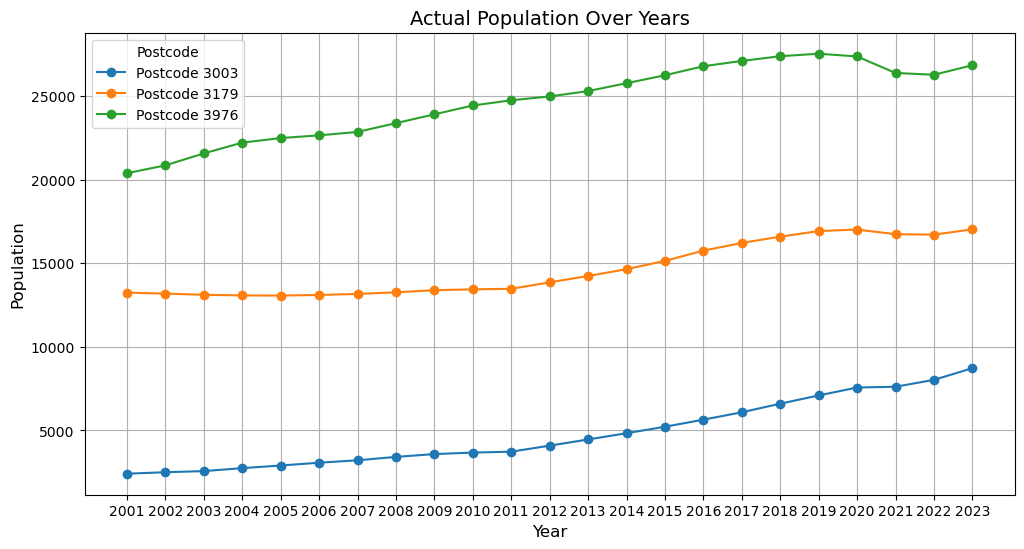

In [15]:
# Visualize original population
import matplotlib.pyplot as plt

# read data
preprocessed_population_df = pd.read_csv('../../data/landing/preprocessed_population_2001-23.csv', encoding='ISO-8859-1')

# plot
preprocessed_population_df = preprocessed_population_df.set_index('Postcode')
selected_rows = preprocessed_population_df.loc[[3003, 3179, 3976]]

plt.figure(figsize=(12,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Actual Population Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()

#### Forecasting

In [16]:
# Predict population in 2000, 2024, 2025
import numpy as np
from sklearn.linear_model import LinearRegression

preprocessed_population_df['1999'] = None
preprocessed_population_df['2000'] = None
preprocessed_population_df['2024'] = None
preprocessed_population_df['2025'] = None
preprocessed_population_df['2026'] = None
preprocessed_population_df['2027'] = None

years = list(map(str, range(2001, 2024)))
training_years = list(map(str, range(2001, 2024)))

for postcode, row_data in preprocessed_population_df.iterrows():
    if all(year in row_data.index for year in training_years):

        X = pd.DataFrame(training_years)
        # log data
        y = row_data[training_years].values.astype(float)
        y[y <= 0] = 0.01
        y_log = np.log(y)
        
        model = LinearRegression()
        model.fit(X, y_log)
        
        population_1999 = round(np.exp(model.predict([[1999]])[0]))
        population_2000 = round(np.exp(model.predict([[2000]])[0]))
        population_2024 = round(np.exp(model.predict([[2024]])[0]))
        population_2025 = round(np.exp(model.predict([[2025]])[0]))
        population_2026 = round(np.exp(model.predict([[2026]])[0]))
        population_2027 = round(np.exp(model.predict([[2027]])[0]))
        
        preprocessed_population_df.at[postcode, '1999'] = population_1999
        preprocessed_population_df.at[postcode, '2000'] = population_2000
        preprocessed_population_df.at[postcode, '2024'] = population_2024
        preprocessed_population_df.at[postcode, '2025'] = population_2025
        preprocessed_population_df.at[postcode, '2026'] = population_2026
        preprocessed_population_df.at[postcode, '2027'] = population_2027

col_2000 = preprocessed_population_df.pop('2000')
preprocessed_population_df.insert(0, '2000', col_2000)
col_1999 = preprocessed_population_df.pop('1999')
preprocessed_population_df.insert(0, '1999', col_1999)

preprocessed_population_df = preprocessed_population_df.reset_index()
preprocessed_population_df.head()

,Postcode,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,3000,8031,8758,7644,9592,11400,12727,14292,15249,16225,...,47554,49645,50297,43577,46906,54001,70193,76552,83486,91049
1,3002,4229,4280,3731,3859,4243,4460,4495,4555,4806,...,5412,5416,5383,4959,4889,5100,5719,5788,5859,5930
2,3003,1993,2118,2413,2503,2570,2748,2903,3072,3216,...,6601,7094,7567,7614,8026,8724,9121,9693,10301,10947
3,3006,5345,5751,4330,5645,7102,8167,9097,9863,10697,...,23153,24402,24856,23113,24199,26166,33280,35806,38523,41447
4,3008,975,1126,194,966,1957,3132,3822,4195,4640,...,16221,17652,18380,17849,18720,20216,35760,41302,47703,55095


In [17]:
# Save population
#preprocessed_population_df.to_csv('../data/landing/population_1999-27.csv', index=False)
# Save population percentage change
population_rate_df.to_csv('../../data/landing/population_percent_change_2000-27.csv', index=False)

#### Visualize predicted data

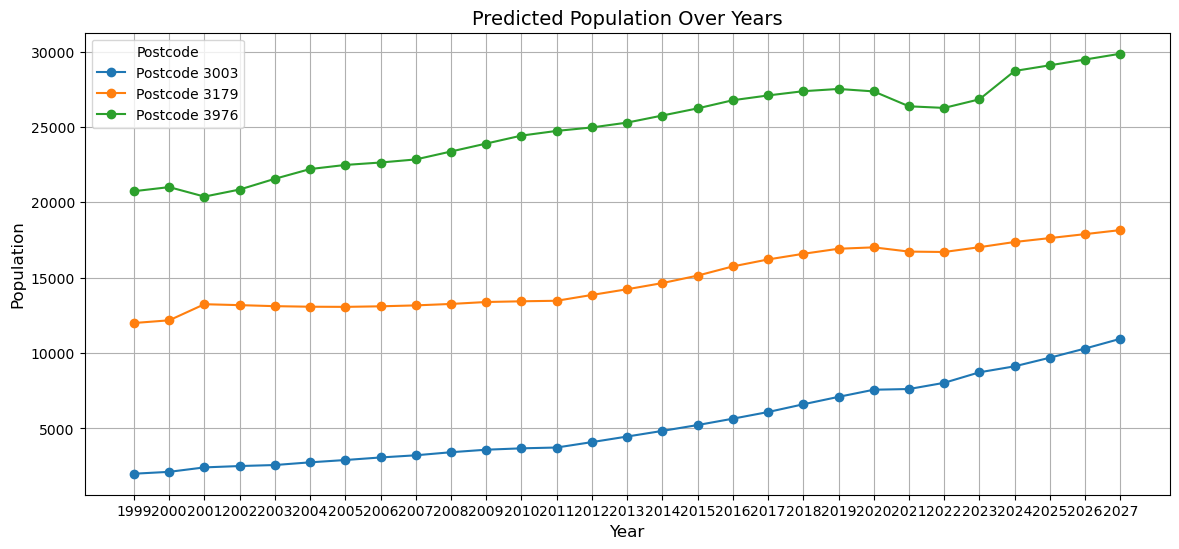

In [18]:
# plot
preprocessed_population_df = preprocessed_population_df.set_index('Postcode')
selected_rows = preprocessed_population_df.loc[[3003, 3179, 3976]]

plt.figure(figsize=(14,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Predicted Population Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()

preprocessed_population_df = preprocessed_population_df.reset_index()

## Evaluate prediction

### Visualize actual vs. predicted data

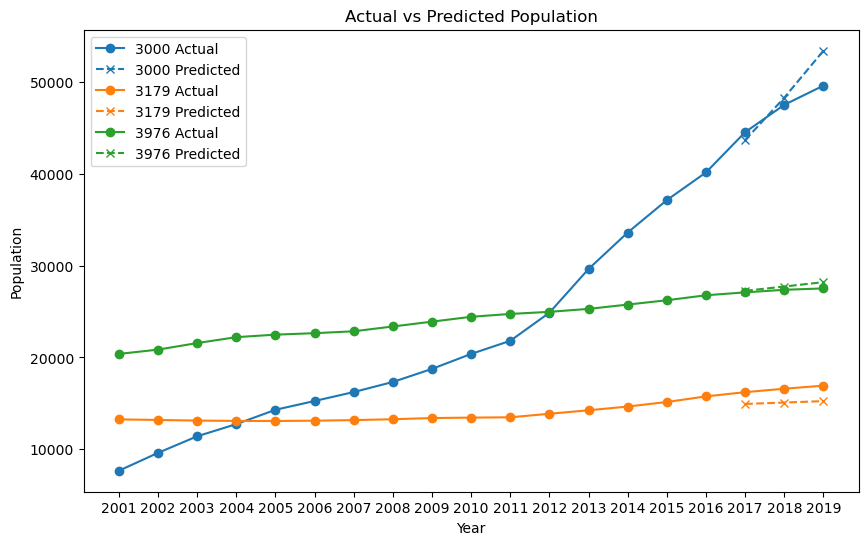

In [19]:
from sklearn.metrics import mean_squared_error
from itertools import cycle

# read data
preprocessed_population_df = pd.read_csv('../../data/landing/preprocessed_population_2001-23.csv', encoding='ISO-8859-1')

# store predicted value
y_pred_list = []
postcode_list = []
predicted_df = pd.DataFrame(columns=['Postcode', '2017', '2018', '2019'])
# store residuals, MSE, and R2
residuals_list = []
mse_list = []
r2_list = []

training_years = list(map(str, range(2001, 2017)))
testing_years = list(map(str, range(2017, 2020)))

for idx, row_data in preprocessed_population_df.iterrows():
    postcode = row_data.iloc[0]
    if all(year in row_data.index for year in training_years):

        # extract data to train and test
        X_train = pd.DataFrame(training_years)
        X_test = pd.DataFrame(testing_years)
        y_test = row_data[testing_years].values.astype(float)
        # log data
        y_train = row_data[training_years].values.astype(float)
        y_train[y_train <= 0] = 0.01
        y_train_log = np.log(y_train)
        
        # fit model
        model = LinearRegression()
        model.fit(X_train, y_train_log)

        # predict 2021-2023
        y_pred_log = model.predict(X_test)
        y_pred = np.exp(y_pred_log)

        # store predicted data
        new_row = pd.DataFrame({
            'Postcode': [postcode],
            '2017': [y_pred[0]],
            '2018': [y_pred[1]],
            '2019': [y_pred[2]]
        })
        predicted_df = pd.concat([predicted_df, new_row], ignore_index=True)

        # compute residual
        residuals = y_test - y_pred
        residuals_list.extend(residuals)
        # compute MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
        # compute R2
        r2 = model.score(X_train, y_train_log)
        r2_list.append(r2)

predicted_df.set_index('Postcode', inplace=True)
preprocessed_population_df.set_index('Postcode', inplace=True)

# Visulize actual vs. predicted data
selected_postcodes = [3000, 3179, 3976]
plt.figure(figsize=(10, 6))
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

for postcode in selected_postcodes:
    # extract data
    actual_training_values = preprocessed_population_df.loc[postcode, training_years].values.astype(float)
    actual_testing_values = preprocessed_population_df.loc[postcode, testing_years].values.astype(float)
    actual_values = list(actual_training_values) + list(actual_testing_values)
    actual_years = training_years + testing_years
    predicted_values = predicted_df.loc[postcode, testing_years].values.astype(float)
    # plot
    color = next(color_cycle)
    plt.plot(actual_years, actual_values, label=f'{postcode} Actual', marker='o', color=color)
    plt.plot(testing_years, predicted_values, label=f'{postcode} Predicted', linestyle='--', marker='x', color=color)

plt.title('Actual vs Predicted Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()


### Residual analysis

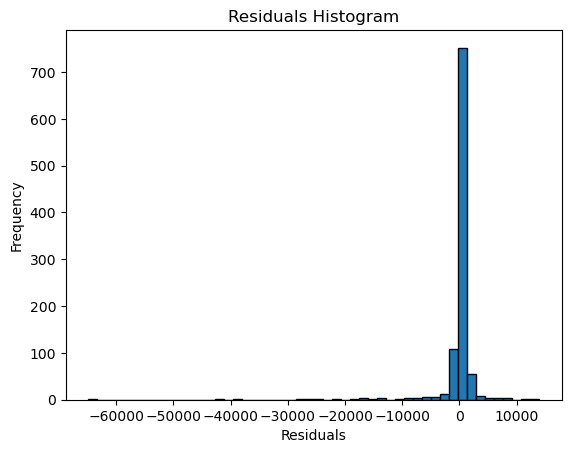

Mean Residual: -216.23823286194505
Standard Deviation of Residuals: 3848.7281857455964


In [20]:
# plot residuals
residuals_df = pd.DataFrame(residuals_list, columns=['Residuals'])

plt.hist(residuals_df['Residuals'], bins=50, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Compute mean and sd for residuals
mean_residual = residuals_df['Residuals'].mean()
std_residual = residuals_df['Residuals'].std()
print(f'Mean Residual: {mean_residual}')
print(f'Standard Deviation of Residuals: {std_residual}')

### MSE computation

In [21]:
mse_array = np.array(mse_list)
mean_mse = mse_array.mean()
std_mse = mse_array.std()
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE: 14844414.055404922
Standard Deviation of MSE: 133787525.3565876


### R2 computation

In [22]:
r2_array = np.array(r2_list)
mean_r2 = r2_array.mean()
std_r2 = r2_array.std()
print(f'Mean R²: {mean_r2}')
print(f'Standard Deviation of R²: {std_r2}')

Mean R²: 0.834989927574504
Standard Deviation of R²: 0.24701320715975908


### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

cv_mse_list = []

for postcode, row_data in preprocessed_population_df.iterrows():
    if all(year in row_data.index for year in training_years):
        X = pd.DataFrame(training_years)
        y = row_data[training_years].values.astype(float)
        y[y <= 0] = 0.01
        y_log = np.log(y)
        
        model = LinearRegression()

        # compute mse by cross validation
        mse_scores = cross_val_score(model, X, y_log, cv=5, scoring='neg_mean_squared_error')
        mean_mse = -np.mean(mse_scores)
        cv_mse_list.append(mean_mse)

print(f'Average Cross-Validation MSE: {np.mean(cv_mse_list)}')

Average Cross-Validation MSE: 0.020326533676330263
